In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # we only use seaborn for smoothing the posteriors with kde

import numpy as np
from scipy import stats

# add the path to the abcTau package
import sys
sys.path.append('C:\\Users\\ipochino\\.conda\\envs\\isttc\\Lib\\site-packages\\abcTau') # IP: replaced previous line with that; relative path was not working
# import the abcTau package
import abcTau


# graphical properties for figures
#sns.set_context('talk',font_scale= 1.5)
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8" 
#plt.rcParams.update({'font.size': 2})

In [3]:
abc_tau_folder = 'D:\\intr_timescales\\abcTau-master\\'
abc_tau_resuls = 'D:\\intr_timescales\\abcTau_results\\'

In [9]:
# load abc results
data_abc_path = abc_tau_resuls + 'example_abc_results/'
# filename = '2on_inhomPois_tau5_80_T1000_lag110_steps45'
filename = 'OU_tau20_mean0_var1_rawData_steps31'
abc_results = np.load(data_abc_path + filename + '.npy', allow_pickle=True)
ind = filename.find('steps') 
final_step = int(filename[ind+5] + filename[ind+6])

# extract estimated parameters
theta_accepted = abc_results[final_step-1]['theta accepted']
tau1 = theta_accepted[0]

# extract the development of the error threshold and acceptance rate during fitting (discarding first iteration)
eps = []
accR = []
steps = np.arange(1,final_step+1)[1:]
for i in range(final_step): 
    step_results = abc_results[i]
    eps.append(step_results['epsilon'])
    accR.append(step_results['n accepted']/step_results['n total'])
eps = eps[1:]
accR = accR[1:]

# ground truth values 
tau1_gt = 20

In [8]:
theta_accepted[0]

array([20.42611052, 19.93644714, 20.18978899, 20.20097549, 20.39656203,
       20.29184775, 20.13978241, 20.62998612, 19.95587329, 20.42234715,
       20.14343321, 20.40570195, 20.00878544, 20.45768807, 20.08502673,
       20.10680411, 20.06320761, 20.2100301 , 20.05499308, 20.03133611,
       20.10623622, 20.03828125, 19.81599389, 20.067894  , 20.03731375,
       20.11189678, 20.24170409, 20.23765736, 19.85363461, 20.03764375,
       19.98718763, 20.21579496, 20.28637983, 19.96764606, 19.99367028,
       20.07699617, 20.17827631, 20.3973798 , 20.18076881, 20.11445835,
       20.10576283, 20.02790494, 20.06564906, 20.09719294, 20.19979091,
       20.04669847, 20.32323917, 20.09895279, 20.34850826, 19.9674399 ,
       20.07970539, 19.95900404, 20.14609506, 20.41692874, 20.16665761,
       20.21998586, 20.04986735, 20.20734298, 20.62929176, 19.82354199,
       20.074649  , 20.13321367, 20.13854433, 20.25334639, 20.10552872,
       20.40696152, 20.0204185 , 20.14942598, 20.19125044, 19.98

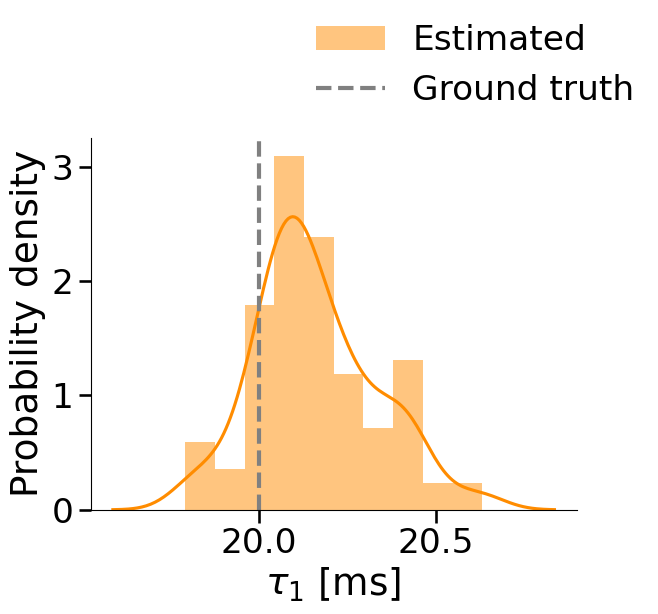

In [26]:
# plot the results
fig = plt.figure(figsize = (24,6))

# plotting variables
cABC = 'darkorange'
ctheor = 'gray'
cAccR = 'r'
cErr = 'b'
a = 0.5
lw = 3

ax = plt.subplot(141)
ax.hist(tau1, facecolor= cABC, density=True, alpha = a, label = r'Estimated')
sns.kdeplot(tau1, color = cABC)
plt.axvline(tau1_gt, color = ctheor, label = r'Ground truth', linewidth = lw, linestyle = '--')

ax.set_xlabel(r'$\tau_1$ [ms]')
ax.set_ylabel('Probability density')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon = False, bbox_to_anchor=(0.4, 1))

fig.tight_layout()